# Analysis of the Sharpe Ratio (SR) for student distributions

## First of all, it is a good idea to have in mind the dimensions of the quantities at stake.
- Sharpe Ratios (SR),'c' in our case, is usually less than 2

In [151]:
import numpy as np
import pandas as pd
from scipy.stats import t as student_t
from matplotlib import pyplot as plt
from sympy.utilities.iterables import multiset_permutations
from itertools import permutations 

In [159]:
def compute_R(p):
    '''
    Computes the number of minima and maximuma (records) of a given random walk p
    '''
    
    '''
    This would be the classic way in  C, but we won't use since it's slow in python
    R_max = 0
    R_min = 0
    v_max = p[0]
    v_min = p[0]
    for i in p:
        if i<=v_min:
            v_min=i
            R_min=R_min+1
        if i>=v_max:
            v_max=i
            R_max=R_max+1
    return R_max
    '''
    R_plus = len(set(np.maximum.accumulate(p)))
    R_minus = len(set(np.minimum.accumulate(p)))
    
    return (R_minus, R_plus)


In [160]:
def compute_R_mean(number_of_series , number_of_permutations , series_size, v, c):
    '''
    For a given student distribution (with v degrees of freedom and expected value c we 
    return the average number of records )
    '''
    std = np.sqrt(v/(v-2))
    SR = c/std
    R_plus_vector = []
    R_minus_vector = []
    for series in range(number_of_series):
        r = (student_t.rvs(v, size=series_size))/std + c
        R_plus_sum = 0
        R_minus_sum = 0
        for permutation in range(number_of_permutations):
            sample_permutation = np.random.permutation(r)
            sample_permutation = np.cumsum(sample_permutation) #Create a random walk from the steps
            R_plus_sum += compute_R(sample_permutation)[1]
            R_minus_sum += compute_R(sample_permutation)[0]

        R_plus_mean = R_plus_sum/number_of_permutations
        R_minus_mean = R_minus_sum/number_of_permutations
        
        R_plus_vector.append(R_plus_mean)
        R_minus_vector.append(R_minus_mean)

    R_plus_mean = np.mean(R_plus_vector)
    R_minus_mean = np.mean(R_minus_vector)

    return (R_minus_mean , R_plus_mean)


In [161]:
def compute_tuple_R_SR(v, number_of_series = 50 , number_of_permutations = 50 , series_size = 400, sr_i = 1e-3, sr_f =1e-2,size_sr = 100):
    sharp_ratio_list = np.linspace(sr_i, sr_f, size_sr)
    #std = np.sqrt(v/(v-2))
    R_plus_list = []
    R_minus_list = []
    for sharp_ratio in sharp_ratio_list:
        c = sharp_ratio ##*std ## from the definition used for sharp ratio
        R_minus_mean , R_plus_mean = compute_R_mean(number_of_series , number_of_permutations , series_size, v, c)
        
        R_plus_list.append(R_plus_mean)
        R_minus_list.append(R_minus_mean)
    return (sharp_ratio_list, R_minus_list, R_plus_list)
    

'''

Apparently it won't be useful
'''
def compute_tuple_R_SR_c(c, number_of_series = 50 , number_of_permutations = 50 , series_size = 400, sr_i = 0.01, sr_f =2,size_sr = 100):
    sharp_ratio_list = np.linspace(sr_i, sr_f, size_sr)
    #std = np.sqrt(v/(v-2))
    R_plus_list = []
    R_minus_list = []
    for sharp_ratio in sharp_ratio_list:
        std = 1 ## By the way we defined the distribution
        v = 2*(std**2)/(std**2-1)
        R_minus_mean , R_plus_mean = compute_R_mean(number_of_series , number_of_permutations , series_size, v, c)
        
        R_plus_list.append(R_plus_mean)
        R_minus_list.append(R_minus_mean)
        
    return (sharp_ratio_list, R_minus_list, R_plus_list)
        

In [162]:
#plt.plot(sharp_ratio_list_3, R_plus_list_3, R_minus_list_3)

def plot_records(sharp_ratio_list,R_minus_list,R_plus_list):
    fig = plt.figure()

    ax = fig.add_axes([0,0,1,1])

    ax.plot(sharp_ratio_list,R_plus_list, label="R+")
    ax.plot(sharp_ratio_list, R_minus_list, label="R-")
    ax.plot(sharp_ratio_list,(np.array(R_plus_list) - np.array(R_minus_list)), label="R0")

    ax.grid(True)
    ax.legend()

## Let's plot for v = 3 and the standard other parameters

In [220]:
(sharp_ratio_list_3, R_minus_list_3, R_plus_list_3) = compute_tuple_R_SR(3, series_size=300, sr_i =1e-3, sr_f =1e-2)

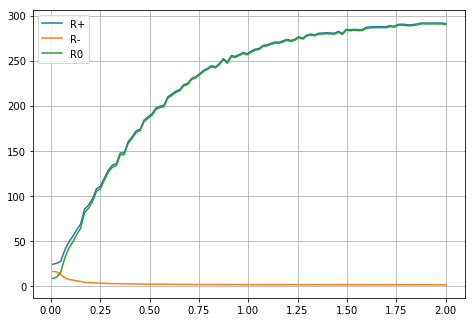

In [65]:
plot_records(sharp_ratio_list_3,R_minus_list_3,R_plus_list_3)

## Now let's try with v = 10

In [68]:
(sharp_ratio_list_10, R_minus_list_10, R_plus_list_10 ) = compute_tuple_R_SR(10, series_size=300,sr_i = 1e-2, sr_f =1)

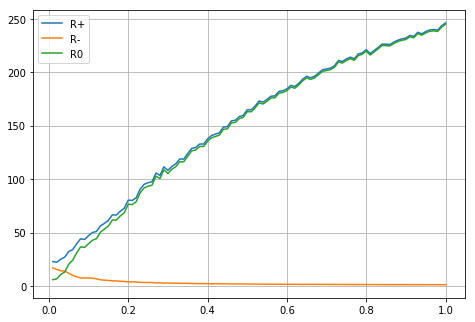

In [69]:
plot_records(sharp_ratio_list_10, R_minus_list_10, R_plus_list_10 )

## Let's plot R in function of the series_size

In [163]:
def compute_tuple_R_series_size(v, c, number_of_series = 50 , number_of_permutations = 50 , series_size_i = 30,series_size_f = 400, step = 3):
    std = np.sqrt(v/(v-2))
    R_plus_list = []
    R_minus_list = []
    series_size_list = range(series_size_i,series_size_f, step) #np.linspace(10,200,1)
    for series_size in series_size_list:
        R_minus_mean , R_plus_mean = compute_R_mean(number_of_series , number_of_permutations , series_size, v, c)
        R_plus_list.append(R_plus_mean)
        R_minus_list.append(R_minus_mean)
        
    return (series_size_list,R_minus_list,R_plus_list )

In [71]:
series_size_list_3,R_minus_list_3,R_plus_list_3 = compute_tuple_R_series_size(3, 0.1)

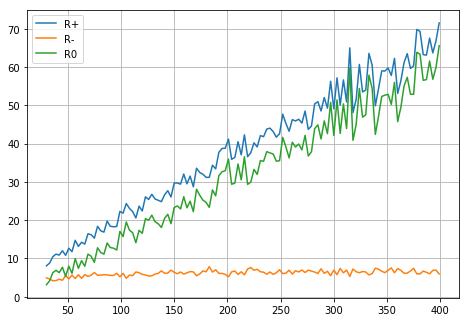

In [72]:
plot_records(series_size_list_3,R_minus_list_3, R_plus_list_3 )

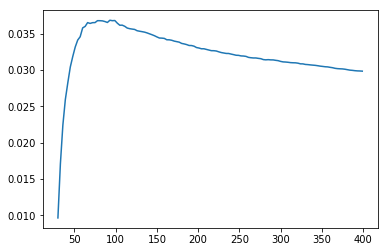

In [14]:
#Verify the behavior of sqrt(n) when c = 0 by integrating to cancel out the randon noise
plt.plot(series_size_list_3, np.cumsum(R_list_3)/np.power(series_size_list_3,2))


## As expected, the number of records increases with the series size (almost in a linear way for this range of series sizes)

# Let's compare the curves with different series_sizes

In [15]:
(sharp_ratio_list_v3_ss300, R_list_v3_ss300) = compute_tuple_R_SR(3, series_size=300)

In [16]:
(sharp_ratio_list_v3_ss50, R_list_v3_ss50) = compute_tuple_R_SR(3, series_size=50)

In [17]:
(sharp_ratio_list_v3_ss500, R_list_v3_ss500) = compute_tuple_R_SR(3, series_size=500)

In [18]:
(sharp_ratio_list_v3_ss150, R_list_v3_ss150) = compute_tuple_R_SR(3, series_size=150)

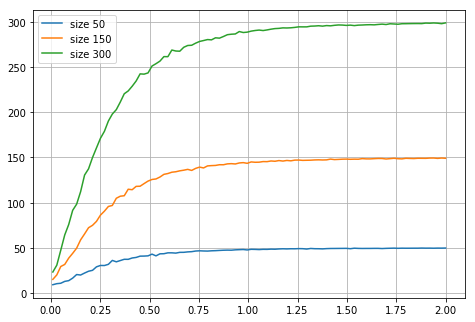

In [19]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(sharp_ratio_list_v3_ss150,R_list_v3_ss50, label="size 50")
ax.plot(sharp_ratio_list_v3_ss150, R_list_v3_ss150, label="size 150")
ax.plot(sharp_ratio_list_v3_ss150,R_list_v3_ss300, label="size 300")
ax.grid(True)
ax.legend()

Using the equation (3) from Challet's article, we would obtain 

# Let's compare the curves with different degrees of freedom

In [ ]:
(sharp_ratio_list_v3_ss150, R_list_v3_ss150) = compute_tuple_R_SR(3, series_size=150)
(sharp_ratio_list_v10_ss150, R_list_v10_ss150) = compute_tuple_R_SR(10, series_size=150)
(sharp_ratio_list_v100_ss150, R_list_v100_ss150) = compute_tuple_R_SR(100, series_size=150)

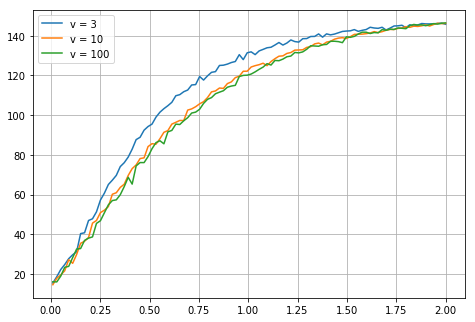

In [65]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(sharp_ratio_list_v3_ss150,R_list_v3_ss150, label="v = 3")
ax.plot(sharp_ratio_list_v3_ss150, R_list_v10_ss150, label="v = 10")
ax.plot(sharp_ratio_list_v3_ss150,R_list_v100_ss150, label="v = 100")

ax.grid(True)

ax.legend()

## Let's now change c instead of varying the degrees of freedom

In [22]:
(sharp_ratio_list_c2_ss150, R_list_c2_ss150) = compute_tuple_R_SR_c(2.1, series_size=150)
(sharp_ratio_list_c5_ss150, R_list_c5_ss150) = compute_tuple_R_SR_c(5, series_size=150)
(sharp_ratio_list_c10_ss150, R_list_c10_ss150) = compute_tuple_R_SR_c(10, series_size=150)

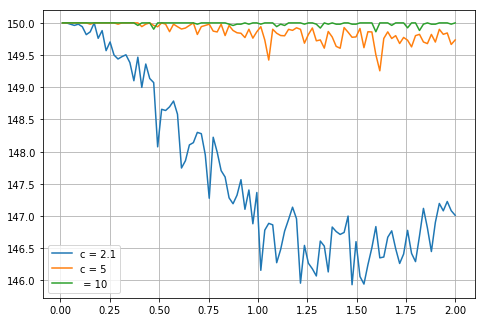

In [23]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(sharp_ratio_list_c2_ss150,R_list_c2_ss150, label="c = 2.1")
ax.plot(sharp_ratio_list_c2_ss150, R_list_c5_ss150, label="c = 5")
ax.plot(sharp_ratio_list_c2_ss150,R_list_c10_ss150, label=" = 10")

ax.grid(True)

ax.legend()

## We can see that for high values of c (expected gain), the number of records is almost independent of the sharp ratio (in the range 0-2). This is due to the fact that since the expected return is too high and each new point is a new record (out of the 150 point, we have almost R+ = 150 for any sharp ratio for c = 10). Let's plot the random walk for c = 10 and sharp ratio = 1 to confirm it.

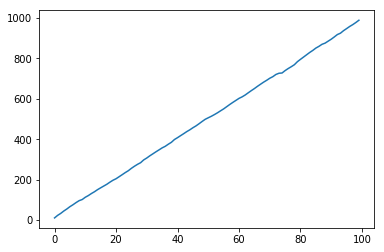

In [77]:
v = 2*100/99
r = student_t.rvs(v, size=100) + 10 
ma = np.cumsum(r)
plt.plot(ma)

### We can then confirm for this random walk that almost each step is a new record

### To change the sharp ratio instead of changing the degrees of freedom we must always have c > SR in order to have a positive degree of freedom v. This might be a little unrealistic since the values of c are too low in real life

## Let's now build a table with values of V, R_plus, R_minus, Series_size and c

In [76]:
def compute_parameters_for(v_i = 2.1, v_f = 11, size_v = 10, number_of_series = 10 , number_of_permutations = 10 , series_size_i = 50, series_size_f = 100, series_size_step = 4, sr_i = 1e-3, sr_f =1e-2,size_sr = 20):
    sharp_ratio_list = np.linspace(sr_i, sr_f, size_sr)
    v_list = np.linspace(v_i, v_f, size_sr)
    series_size_list = range(series_size_i,series_size_f, series_size_step)
    features = []
    for sharp_ratio in sharp_ratio_list:
        for v in v_list:
            for series_size in series_size_list:

                c = sharp_ratio ##*std ## from the definition used for sharp ratio
                R_minus_mean , R_plus_mean = compute_R_mean(number_of_series , number_of_permutations , series_size, v, c)
                
                features.append([sharp_ratio, v, series_size,R_minus_mean,R_plus_mean])
    return features
    

In [116]:
import random

In [127]:
def compute_parameters_random(number_of_points, v_i = 2.1, v_f = 11, number_of_series = 10 , number_of_permutations = 10 , series_size_i = 50, series_size_f = 300, sr_i = 1e-1, sr_f =2):
    '''
    This function is about 7 times slower than the compute_parameters_for to generate the same number of points
    '''
    
    features = []
    for i in range(number_of_points):
        c = random.uniform(sr_i,sr_f)
        v =  random.uniform(v_i,v_f)
        series_size = random.randint(series_size_i,series_size_f + 1)
        R_minus_mean , R_plus_mean = compute_R_mean(number_of_series , number_of_permutations , series_size, v, c)
        features.append([c, v, series_size,R_minus_mean,R_plus_mean])
    return features
    

In [85]:
%%time
features = compute_parameters_for(v_i = 2.1, v_f = 11, size_v = 10, number_of_series = 5 , number_of_permutations = 5 , series_size_i = 50, series_size_f = 100, series_size_step = 10, sr_i = 1e-1, sr_f =2,size_sr = 10)

Wall time: 1.17 s


In [206]:
%%time
features_random = compute_parameters_random(100000)

Wall time: 23min 25s


In [207]:
df = pd.DataFrame.from_records(features_random, columns = ['c' , 'v', 'n', 'R-', 'R+'])

In [208]:
df.to_csv('features_random_100k', index = False)

In [209]:
df = pd.read_csv('features_random_100k')

In [219]:
df.head()

,c,v,n,R-,R+
0,1.947994,6.360106,165,1.05,159.73
1,1.364249,2.480504,237,1.09,223.71
2,0.557960,6.681221,297,1.84,170.13
3,0.629518,9.214040,204,1.64,129.90
4,0.348371,2.146851,192,1.40,139.88


In [210]:
df.describe()

,c,v,n,R-,R+
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.049562,6.559343,175.814710,1.581505,133.446648
std,0.549142,2.570288,72.687049,0.984505,69.505153
min,0.100001,2.100087,50.000000,1.000000,8.800000
25%,0.573738,4.333339,113.000000,1.060000,74.190000
50%,1.050677,6.560476,176.000000,1.180000,124.680000
75%,1.526358,8.786496,239.000000,1.600000,187.700000
max,1.999981,10.999987,301.000000,12.210000,297.970000


In [211]:
df.corr()

,c,v,n,R-,R+
c,1.000000,-0.000035,0.002814,-0.691724,0.517652
v,-0.000035,1.000000,-0.002996,0.058348,-0.048119
n,0.002814,-0.002996,1.000000,0.005671,0.790553
R-,-0.691724,0.058348,0.005671,1.000000,-0.490838
R+,0.517652,-0.048119,0.790553,-0.490838,1.000000


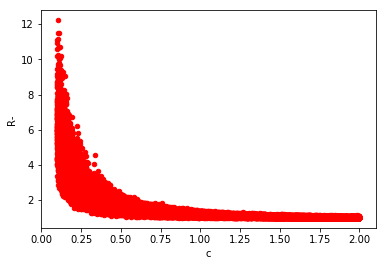

In [218]:
df.plot(kind='scatter',x='c',y='R-',color='red')
plt.show()

In [166]:
from sklearn.model_selection import train_test_split

In [213]:
Y = df['c']
X = df.iloc[:,1:]

In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    shuffle = True, 
                                                    test_size = 0.15, random_state=10)

## Let's apply PCA to see wether the features space can have its dimension reduced in order to avoid overfitting

In [171]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
dict_pca = {}
dict_e_pca_train = {}
dict_var_exp_train = {}
dict_e_pca_test = {}
hs = [1, 2, 3, 4]

for h in hs:
    dict_pca[h] = PCA(n_components = h)
    dict_pca[h].fit(X_train)
    pca = dict_pca[h]
    Z_train = pca.transform(X_train)
    Xtilde_train = pca.inverse_transform(Z_train)
    e_pca_train = mean_squared_error(X_train, Xtilde_train)
    var_exp_train = np.sum(pca.explained_variance_ratio_)
    dict_e_pca_train[h] = e_pca_train
    dict_var_exp_train[h] = var_exp_train
    Z_test = pca.transform(X_test)
    Xtilde_test = pca.inverse_transform(Z_test)
    e_pca_test = mean_squared_error(X_test, Xtilde_test)
    dict_e_pca_test[h] = e_pca_test
    print("SKL PCA, h =", h, "PCs, reconstruction error:", str(round(e_pca_train, 4)),
          "total ratio of variance explained:", str(round(var_exp_train, 4)))

SKL PCA, h = 1 PCs, reconstruction error: 252.9821 total ratio of variance explained: 0.8986
SKL PCA, h = 2 PCs, reconstruction error: 1.7177 total ratio of variance explained: 0.9993
SKL PCA, h = 3 PCs, reconstruction error: 0.073 total ratio of variance explained: 1.0
SKL PCA, h = 4 PCs, reconstruction error: 0.0 total ratio of variance explained: 1.0


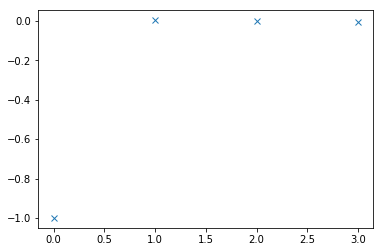

In [184]:
plt.plot(dict_pca[3].components_[2], 'x')

### As we could expect, we don't need all the 4 variables (n,v,R+,R-) to explain the data variation, since R- brings too little information in our 'c' values range

In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [216]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

In [217]:
m = Sequential()
m.add(Dense(20,  activation='relu', input_shape=(4,)))
#m.add(Dense(30,  activation='relu'))
#m.add(Dense(30,  activation='relu')) 
m.add(Dense(20,  activation='relu')) 
m.add(Dense(20,  activation='relu')) 
m.add(Dense(20,  activation='relu')) 
m.add(Dense(15,  activation='relu')) 
m.add(Dense(10,  activation='relu'))
m.add(Dense(5,  activation='relu'))
m.add(Dense(3,  activation='relu'))
m.add(Dense(1,  activation='linear'))
m.compile(loss='mean_squared_error', optimizer = Adam(), metrics=['mape'])

#history = m.fit(X_train_n, Y_train, batch_size=10, epochs=20, verbose=1, validation_data = (X_test_n, Y_test))

history = m.fit(X_train_n, Y_train, epochs=30, verbose=1, validation_data = (X_test_n, Y_test))

Train on 85000 samples, validate on 15000 samples
Epoch 1/30
85000/85000 [==============================] - 4s 52us/step - loss: 0.0306 - mean_absolute_percentage_error: 11.6389 - val_loss: 0.0082 - val_mean_absolute_percentage_error: 7.4661
Epoch 2/30
85000/85000 [==============================] - 3s 34us/step - loss: 0.0069 - mean_absolute_percentage_error: 6.9339 - val_loss: 0.0063 - val_mean_absolute_percentage_error: 6.3968
Epoch 3/30
85000/85000 [==============================] - 3s 34us/step - loss: 0.0056 - mean_absolute_percentage_error: 6.2945 - val_loss: 0.0046 - val_mean_absolute_percentage_error: 5.7706
Epoch 4/30
85000/85000 [==============================] - 3s 34us/step - loss: 0.0052 - mean_absolute_percentage_error: 5.9966 - val_loss: 0.0044 - val_mean_absolute_percentage_error: 5.4707
Epoch 5/30
85000/85000 [==============================] - 3s 34us/step - loss: 0.0049 - mean_absolute_percentage_error: 5.7590 - val_loss: 0.0048 - val_mean_absolute_percentage_error: 6